# Test the differents function
author : Sofiane Horache

In [15]:
# library used
import numpy as np
import pandas as pd
from utils.ply import *
from LOD_descriptor import pc_to_patches, patches_to_id, id_to_dic
import matplotlib.pyplot as plt
from octree import *
from sklearn.preprocessing import LabelBinarizer
%matplotlib inline

In [11]:
# load data
filepath = "../data/GT_Madame1_2.ply"
data = read_ply(filepath)
xyz = np.vstack((data['x'], data['y'], data['z'])).T
y = data['class']

Size of the points cloud : (10000000, 3)
Number of class : 15
[  3.00000000e+00   4.76941700e+06   4.33305900e+06   0.00000000e+00
   7.90822000e+05   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   3.65600000e+03   8.17450000e+04   0.00000000e+00
   0.00000000e+00   0.00000000e+00   1.14630000e+04   2.54200000e+03
   0.00000000e+00   0.00000000e+00   0.00000000e+00   3.03000000e+03
   9.83000000e+02   1.11000000e+02   1.91500000e+03   3.84000000e+02
   8.70000000e+02]


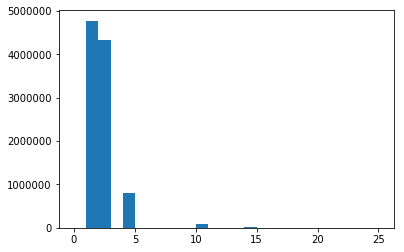

In [13]:
# print some info
print("Size of the points cloud :", xyz.shape)
print("Number of class :", len(np.unique(y)))
h = plt.hist(y.copy(), 25)
print(h[0])

conclusion: The classes are inequal, we will have to select the training set.
## 1] We create divide the points cloud into patches

The problem here is the author didn't precise how we extract the patches. Maybe the patches have a kind of shape. So We suppose patches are just a group of points in a square of fixed size. We will not use the PCS.

In [4]:
# We test here id_to_dic

a = 2 * np.random.randn(100000, 3)
p = pc_to_patches(a, 1)
id_p = patches_to_id(p, a.shape[0])
new_p = id_to_dic(id_p)
for k in p.keys():
    if(set(new_p[k])!= set(p[k])):
        print(error)
        
# It seems to work
# but it is long

In [6]:
patches = pc_to_patches(xyz, 1) # very long !!!
id_patches = patches_to_id(patches, xyz.shape[0])
write_ply("../data/paris_patched.ply",[xyz, id_patches, y],['x', 'y', 'z', 'patches', 'class'])

In [5]:
data = read_ply('../data/paris_patched.ply')
xyz = np.vstack((data['x'], data['y'], data['z'])).T
y = data['class']
id_patches = data['patches']
#patches = id_to_dic(id_patches)

## 2]  computation of the descriptors
Here we will compute 
### 2.1 the octree structure

We will test the octree structure with a 3D sphere(gaussian law) and a cube(uniform low). We will also try for a plane and a line.

In [6]:
# LOD for a ball
ball = np.random.randn(1000, 3)
tree = Octree(3, ball)
print("For a ball")
print("Number of cube per LOD :", tree.divide())

#LOD for a cube
cube = np.random.rand(1000, 3)
tree = Octree(3, cube)
print("For a a cube")
print("Number of cube per LOD :", tree.divide())

#LOD for a line
a, b = np.random.rand(2)
x = np.random.rand(1000, 1)
line = np.hstack((x, a*x, b*x))
tree = Octree(3, line)
print("For a line")
print("Number of cube per LOD :", tree.divide())

#LOD for two lines
a, b = np.random.rand(2)
x = np.random.rand(500, 1)
line1 = np.hstack((x, a*x, b*x))
a, b = np.random.rand(2)
line2 = np.hstack((x, a*x, b*x))
two_lines = np.vstack((line1, line2))
tree = Octree(3, two_lines)
print("For two lines")
print("Number of cube per LOD :", tree.divide())


#LOD for a horizontal plane
a, b = np.random.rand(2)
xy = np.random.rand(1000, 2)
plane = np.hstack((xy, (0*xy[:, 0]+b*xy[:, 1]).reshape(-1, 1)))
tree = Octree(3, plane)
print("For a horizontal plane")
print("Number of cube per LOD :", tree.divide())

#LOD for a diagonal plane
a, b = np.random.rand(2)
xy = np.random.rand(1000, 2)
plane = np.hstack((xy, (a*xy[:, 0]+b*xy[:, 1]).reshape(-1, 1)))
tree = Octree(3, plane)
print("For a diagonal plane")
print("Number of cube per LOD :", tree.divide())

#LOD for 2 planes

a, b = np.random.rand(2)
xy = np.random.rand(500, 2)
plane1 = np.hstack((xy, (a*xy[:, 0]+b*xy[:, 1]).reshape(-1, 1)))
a, b = np.random.rand(2)
plane2 = np.hstack((xy, (a*xy[:, 0]+b*xy[:, 1]).reshape(-1, 1)))
two_planes = np.vstack((plane1, plane2))
tree = Octree(3, two_planes)
print("For two planes")
print("Number of cube per LOD :", tree.divide())


 


For a ball
Number of cube per LOD : [   1.    8.   50.  208.]
For a a cube
Number of cube per LOD : [   1.    8.   64.  449.]
For a line
Number of cube per LOD : [ 1.  2.  4.  8.]
For two lines
Number of cube per LOD : [  1.   3.  10.  20.]
For a horizontal plane
Number of cube per LOD : [  1.   4.  16.  64.]
For a diagonal plane
Number of cube per LOD : [   1.    7.   29.  110.]
For two planes
Number of cube per LOD : [   1.    7.   42.  184.]


In [7]:
# We can compute feature for each patch
a, b = np.random.rand(2)
xy = np.random.rand(1000, 2)
plane = np.hstack((xy, (a*xy[:, 0]+b*xy[:, 1]).reshape(-1, 1)))
tree = Octree(3, plane)
ppl1 = tree.divide()
phi1 = tree.get_phi()


xy = 4+ np.random.rand(1000, 2)
#a, b = np.random.rand(2)
plane = np.hstack((xy, (4*a*xy[:, 0]+4*b*xy[:, 1]).reshape(-1, 1)))
tree = Octree(3, plane)
ppl2 = tree.divide()
phi2 = tree.get_phi()

#compare plan
for i in range(1,4):
    print("LOD %d:"%i)
    print(np.dot(phi1[i], phi1[i]))
    print(np.dot(phi2[i], phi2[i]))
    print(np.dot(phi1[i], phi2[i]))

# seems coherent

LOD 1:
6.0
6.0
6.0
LOD 2:
27.0
26.0
24.0
LOD 3:
105.0
102.0
93.0


Conclusion : for low dimension shape, we are rather robust to count the dimensions, but for 3D objects, we need a lot of points(see the cube or the ball). For the cube, as we have some holes(because of random variables. We don't have a full precision so the estimation is not 100% exact).
Theoretical consistency for a ball.

Also the problem will be if we have two shapes in our octree. Then the dimension is harder to guess

The second test is to see for each level which cube is non empty. the indexation is a bit weird. So we have to change it. We therefore have a way to compare the differents patches at each level

### 2.2 the descriptors

In [17]:
# We will compute the ppl for each patches
print(len(np.unique(id_patches)))
print(np.unique(y))
lab = LabelBinarizer()
one_hot = lab.fit_transform(y) 


9942
[ 0  1  2  4  9 10 14 15 19 20 21 22 23 24 25]


In [ ]:
print(one_hot)
df = pd.DataFrame(np.hstack((one_hot, id_patches.reshape(-1,1))), columns=np.concatenate((y, 'id_patch')))


[[0 1 0 ..., 0 0 0]
 [0 0 1 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 ..., 
 [0 1 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]]
